In [1]:
import pandas as pd
import gzip
import json
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Electronics_5.json.gz')

In [2]:
df = df.drop(['image'], axis=1)
df = df.drop(['style'], axis=1)
df = df.drop(['verified'], axis=1)
df = df.drop(['unixReviewTime'], axis=1)
df = df.drop(['summary'], axis=1)

In [ ]:
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump(df, f)

In [137]:
import pickle
# Load the pickle file
def load():
    with open('data.pickle', 'rb') as f:
        loaded_data = pickle.load(f)
        return loaded_data
    
df = load()

In [138]:
import pickle
# Load the pickle file
def load():
    with open('metadata.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
        return loaded_data
    
meta_df = load()

In [139]:
meta_df['category'] = meta_df['category'].apply(lambda x: [category.lower().strip() for category in x])

# Filter rows where "headphones" is in the categories list
meta_df = meta_df[meta_df['category'].apply(lambda x: 'headphones' in x)]

# Reset the index after filtering
meta_df.reset_index(drop=True, inplace=True)

print(meta_df)



             asin                                              title  \
0      0132492776  Wireless Bluetooth Headphones Earbuds with Mic...   
1      0558835155  Polaroid Pbm2200 PC / Gaming Stereo Headphones...   
2      0594478162                Official Nook Audio Ie250 Earphones   
3      0646531158  In Search of Tom Bowen and the Therapy He Insp...   
4      0684873176  The Mutineer: Rants, Ravings, and Missives fro...   
...           ...                                                ...   
31110  B01HJ8E11E  Bluetooth Headphones,Yostyle Wireless Headphon...   
31111  B01HJAVYDU  MAXROCK Noise Isolating Sleeping Headphones Ea...   
31112  B01HJAPNHI  Wireless Bluetooth Headset, HandsFree Wireless...   
31113  B01HJAVZI4  MAXROCK Wired Headphones In-ear Headphone Spor...   
31114  B01HJAVXMC  MAXROCK Noise Isolating Sleeping Headphones Ea...   

                 brand                                      category  
0      Enter The Arena  [electronics, headphones, earbud headpho

In [140]:
meta_df = meta_df.drop_duplicates(subset=['asin'])
print(meta_df)

             asin                                              title  \
0      0132492776  Wireless Bluetooth Headphones Earbuds with Mic...   
1      0558835155  Polaroid Pbm2200 PC / Gaming Stereo Headphones...   
2      0594478162                Official Nook Audio Ie250 Earphones   
3      0646531158  In Search of Tom Bowen and the Therapy He Insp...   
4      0684873176  The Mutineer: Rants, Ravings, and Missives fro...   
...           ...                                                ...   
31110  B01HJ8E11E  Bluetooth Headphones,Yostyle Wireless Headphon...   
31111  B01HJAVYDU  MAXROCK Noise Isolating Sleeping Headphones Ea...   
31112  B01HJAPNHI  Wireless Bluetooth Headset, HandsFree Wireless...   
31113  B01HJAVZI4  MAXROCK Wired Headphones In-ear Headphone Spor...   
31114  B01HJAVXMC  MAXROCK Noise Isolating Sleeping Headphones Ea...   

                 brand                                      category  
0      Enter The Arena  [electronics, headphones, earbud headpho

In [141]:
asin_set = set(meta_df['asin'])
print(len(asin_set))

30471


In [142]:

df = df.drop(['reviewerName'], axis=1)
df = df.drop(['vote'], axis=1) 


In [49]:
print(df)

         overall   reviewTime      reviewerID        asin  \
0            5.0  09 18, 1999   AAP7PPBU72QFM  0151004714   
1            3.0  10 23, 2013  A2E168DTVGE6SV  0151004714   
2            5.0   09 2, 2008  A1ER5AYS3FQ9O3  0151004714   
3            5.0   09 4, 2000  A1T17LMQABMBN5  0151004714   
4            3.0   02 4, 2000  A3QHJ0FXK33OBE  0151004714   
...          ...          ...             ...         ...   
6739585      4.0  03 21, 2017  A33MAQA919J2V8  B01HJH40WU   
6739586      4.0   01 9, 2017  A1AKHSCPD1BHM4  B01HJH40WU   
6739587      5.0   12 1, 2016  A2HUZO7MQAY5I2  B01HJH40WU   
6739588      5.0  11 29, 2016   AJJ7VX2L91X2W  B01HJH40WU   
6739589      5.0  03 31, 2017  A1FGCIRPRNZWD5  B01HJF704M   

                                                reviewText  
0        This is the best novel I have read in 2 or 3 y...  
1        Pages and pages of introspection, in the style...  
2        This is the kind of novel to read when you hav...  
3        What gorgeous 

In [143]:
df = df[df['asin'].isin(asin_set)]
print(df)

         overall   reviewTime      reviewerID        asin  \
2441         5.0  02 22, 2015  A38RQFVQ1AKJQQ  4126895493   
2442         5.0   05 8, 2017  A299MRB9O6GWDE  4126895493   
2443         1.0   11 5, 2016  A3ACFC6DQQLIQT  4126895493   
2444         3.0  09 24, 2016  A36BC0YFDBNB5X  4126895493   
2445         1.0  07 17, 2016  A212PQ0HQPNNWM  4126895493   
...          ...          ...             ...         ...   
6739452      5.0   05 4, 2018  A3E7OV7IR941JI  B01HI7D4VY   
6739453      3.0  03 14, 2018  A26I2RPRWOGD2V  B01HI7D4VY   
6739559      4.0  09 22, 2018   A3VA3VK4PO1JD  B01HJ8E11E   
6739560      3.0  09 12, 2018  A11TVS6FKXS80H  B01HJ8E11E   
6739561      4.0  08 18, 2018  A3VM9K4M0RQZRQ  B01HJ8E11E   

                                                reviewText  
2441     Great headphones. It's just the cord is too sh...  
2442     Really like these headphone.  Wanted something...  
2443     Wire to headphone broke off in less than a mon...  
2444                   

In [144]:
df.dropna(inplace=True)
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)
print(df)

        overall   reviewTime      reviewerID        asin  \
0           5.0  02 22, 2015  A38RQFVQ1AKJQQ  4126895493   
1           5.0   05 8, 2017  A299MRB9O6GWDE  4126895493   
2           1.0   11 5, 2016  A3ACFC6DQQLIQT  4126895493   
3           3.0  09 24, 2016  A36BC0YFDBNB5X  4126895493   
4           1.0  07 17, 2016  A212PQ0HQPNNWM  4126895493   
...         ...          ...             ...         ...   
372162      5.0   05 4, 2018  A3E7OV7IR941JI  B01HI7D4VY   
372163      3.0  03 14, 2018  A26I2RPRWOGD2V  B01HI7D4VY   
372164      4.0  09 22, 2018   A3VA3VK4PO1JD  B01HJ8E11E   
372165      3.0  09 12, 2018  A11TVS6FKXS80H  B01HJ8E11E   
372166      4.0  08 18, 2018  A3VM9K4M0RQZRQ  B01HJ8E11E   

                                               reviewText  
0       Great headphones. It's just the cord is too sh...  
1       Really like these headphone.  Wanted something...  
2       Wire to headphone broke off in less than a mon...  
3                                      

In [145]:
num_reviews = len(df)
print(f"Number of reviews for headphones: {num_reviews}")

avg_rating_score = df['overall'].mean()
print(f"Average rating score for headphones: {avg_rating_score:.2f}")

num_unique_products = len(asin_set)
print(f"Number of unique products for headphones: {num_unique_products}")

num_good_ratings = len(df[df['overall'] >= 3])
print(f"Number of good ratings for headphones: {num_good_ratings}")

num_bad_ratings = len(df[df['overall'] < 3])
print(f"Number of bad ratings for headphones: {num_bad_ratings}")


reviews_per_rating = df['overall'].value_counts().sort_index()
print(f"Reviews per rating for headphones:\n{reviews_per_rating}")


Number of reviews for headphones: 372167
Average rating score for headphones: 4.01
Number of unique products for headphones: 30471
Number of good ratings for headphones: 312041
Number of bad ratings for headphones: 60126
Reviews per rating for headphones:
overall
1.0     31616
2.0     28510
3.0     41427
4.0     75024
5.0    195590
Name: count, dtype: int64


In [ ]:
import pandas as pd
import re
import unicodedata
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.lang.en import English

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')

# Download spaCy English language model (if not already downloaded)
spacy.cli.download("en_core_web_sm")

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Function to expand acronyms
def expand_acronyms(text):
    # Define acronym dictionary (add more as needed)
    acronyms = {
        "lol": "laugh out loud",
        "brb": "be right back"
        # Add more acronyms and their expansions here
    }
    # Replace acronyms with expansions
    for acronym, expansion in acronyms.items():
        text = re.sub(r'\b' + re.escape(acronym) + r'\b', expansion, text)
    return text

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Function for lemmatization
def lemmatize_text(text):
    lemma_words = []
    doc = nlp(text)
    for token in doc:
        lemma_words.append(token.lemma_)
    return ' '.join(lemma_words)

# Function for text normalization
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Assuming df is your DataFrame containing reviews
# Read your DataFrame here, or create it if not done already
# df = pd.read_csv("your_dataframe.csv")

# Preprocess reviewText column
df['reviewText'] = df['reviewText'].apply(remove_html_tags)
df['reviewText'] = df['reviewText'].apply(remove_accented_chars)
df['reviewText'] = df['reviewText'].apply(expand_acronyms)
df['reviewText'] = df['reviewText'].apply(remove_special_characters)
df['reviewText'] = df['reviewText'].apply(lemmatize_text)
df['reviewText'] = df['reviewText'].apply(normalize_text)

# Optionally, you can display the preprocessed DataFrame
print(df)


In [91]:
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    punctuation = string.punctuation
    filtered_tokens_without_punct = [
        token for token in filtered_tokens if token not in punctuation
    ]

    # Remove blank space tokens
    filtered_tokens_without_blanks = [
        token for token in filtered_tokens_without_punct if token.strip()
    ]

    preprocessed_text = " ".join(filtered_tokens_without_blanks)

    return preprocessed_text

df['reviewText'] = df['reviewText'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ps213\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
import pickle
with open('preprocessed_data.pickle', 'wb') as f:
    pickle.dump(df, f)



In [146]:
import pickle
# Load the pickle file
def load():
    with open('preprocessed_data.pickle', 'rb') as f:
        loaded_data = pickle.load(f)
        return loaded_data
    
df = load()

In [148]:
import pandas as pd
merged_df = pd.merge(meta_df, df, on='asin', how='inner')


# Step 2: Count the occurrences of each brand
brand_counts = merged_df['brand'].value_counts()

# Step 3: Sort the counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Step 4: Extract the top 20 brands
top_20_brands = sorted_brand_counts.head(20)

# Display the top 20 most reviewed brands in the headphones category
print("Top 20 most reviewed brands in the headphones category:")
print(top_20_brands)

Top 20 most reviewed brands in the headphones category:
brand
Sony              32955
Sennheiser        21516
Bose               9582
Plantronics        8340
Skullcandy         8316
JLAB               7731
JVC                7692
Audio-Technica     6791
Philips            6527
Panasonic          6053
Koss               5784
LG                 5624
Samsung            5604
Mpow               5480
Bluedio            5132
MEE audio          4644
Anker              4290
Symphonized        4284
TaoTronics         4059
Klipsch            4050
Name: count, dtype: int64


In [149]:
merged_df = pd.merge(meta_df, df, on='asin', how='inner')

# Step 2: Count the occurrences of each brand
brand_counts = meta_df['brand'].value_counts()

# Step 3: Sort the counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=True)

# Step 4: Extract the top 20 brands
top_20_brands = sorted_brand_counts.head(20)

# Display the top 20 most reviewed brands in the headphones category
print("Top 20 least reviewed brands in the headphones category:")
print(top_20_brands)

Top 20 least reviewed brands in the headphones category:
brand
kathy ireland CONNECT     1
BBK                       1
Better Products Global    1
Minidi                    1
HARD CORE TECH            1
veniam                    1
TONESOUL                  1
zhuoyue                   1
aoda                      1
Fantronics                1
CalorMixs                 1
RTPWireless               1
Nameo                     1
CYNDIE Wedding Favor      1
GPX                       1
KEKU                      1
ART                       1
fFLAT5                    1
Santagada Music           1
Lorida                    1
Name: count, dtype: int64


In [150]:
# Step 2: Group the data by product (title) and calculate the sum of positive class ratings
positive_ratings_sum = merged_df.groupby('title')['overall'].apply(lambda x: (x >= 3).sum())

# Step 3: Find the headphone with the highest sum of positive class ratings
most_positively_reviewed_headphone = positive_ratings_sum.idxmax()

brand_of_most_positively_reviewed = merged_df.loc[merged_df['title'] == most_positively_reviewed_headphone, 'brand'].iloc[0]
# Display the most positively reviewed headphone
print(f"The most positively reviewed headphone is: {most_positively_reviewed_headphone} provided by {brand_of_most_positively_reviewed}")

The most positively reviewed headphone is: Sony MDRZX100 Headphones (Black) provided by Sony


In [8]:
# Assuming headphones_df is the DataFrame containing headphones data

# Step 1: Convert the reviewTime column to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Step 2: Extract the year from the reviewTime column
df['year'] = df['reviewTime'].dt.year

# Step 4: Group the data by year and count the ratings for each year
ratings_count_by_year = df.groupby('year')['overall'].count()

year_with_max_count = ratings_count_by_year.idxmax()

# Step 5: Display the count of ratings for each of the 5 consecutive years
print("Count of ratings for 'headphones' over 5 consecutive years:")
print(ratings_count_by_year)

print()
print()
print(f"Year with maximum reviews: {year_with_max_count} with {ratings_count_by_year[year_with_max_count]} reviews")




Count of ratings for 'headphones' over 5 consecutive years:
year
2000       24
2001       45
2002       75
2003      123
2004      333
2005      893
2006     1545
2007     3049
2008     4837
2009     6808
2010     7327
2011    10447
2012    15092
2013    31878
2014    54989
2015    88899
2016    85594
2017    43527
2018    16682
Name: overall, dtype: int64


Year with maximum reviews: 2015 with 88899 reviews


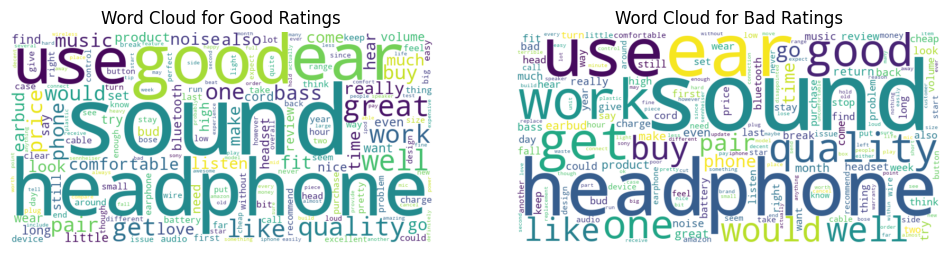

In [151]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

good_reviews = df[df['overall'] >= 3]['reviewText']
bad_reviews = df[df['overall'] < 3]['reviewText']

good_words = ' '.join(good_reviews).split()
bad_words = ' '.join(bad_reviews).split()


good_word_freq = Counter(good_words)
bad_word_freq = Counter(bad_words)


good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(good_word_freq)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bad_word_freq)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.show()



In [152]:

import matplotlib.pyplot as plt

def scale_Plot(a, b):
    scaled_values = []
    max_mae = max(b)
    min_mae = min(b)
    
    for k, mae in zip(a, b):
        scaled_values.append( mae/3)
    
    scaled_values.reverse()
    # Plot
    plt.figure(figsize=(8, 6))
    
    plt.plot(a, scaled_values, marker='o', linestyle='-')
    plt.title('Mean Absolute Error (MAE) vs. K')
    plt.xlabel('K')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.grid(True)
    # plt.xticks(a)
    plt.show()

    return scaled_values

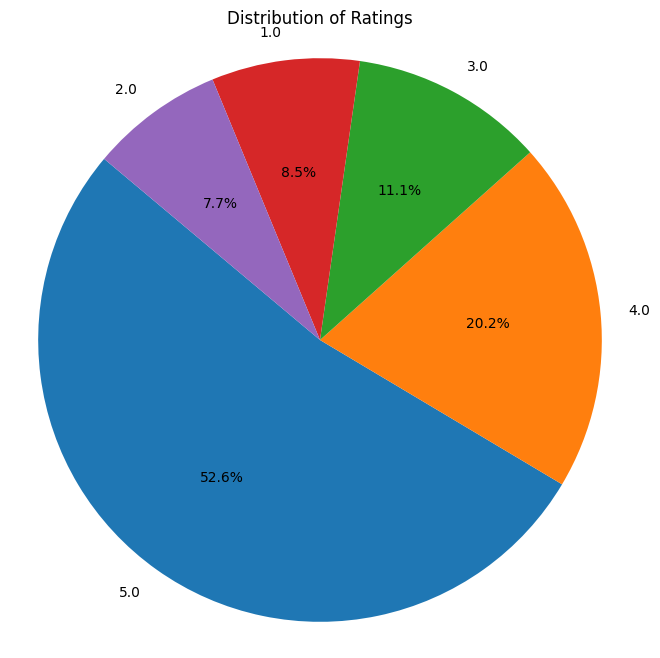

In [155]:



import matplotlib.pyplot as plt


# Step 1: Count the occurrences of each rating
rating_counts = df['overall'].value_counts()

# Step 2: Plot a pie chart to visualize the distribution of ratings
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()





In [132]:

# Assuming your DataFrame is named 'df'
# If the 'reviewTime' column is not already in datetime format, convert it
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Group by year and count unique reviewerIDs
customer_count_per_year = df.groupby(df['reviewTime'].dt.year)['reviewerID'].nunique()

# Find the year with the highest number of customers
year_with_most_customers = customer_count_per_year.idxmax()
num_customers_highest_year = customer_count_per_year.max()

print(f"The year with the highest number of customers is {year_with_most_customers} with {num_customers_highest_year} customers.")


The year with the highest number of customers is 2015 with 1870 customers.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

tfidf_vectorizer = TfidfVectorizer(max_features=50000) 
X = tfidf_vectorizer.fit_transform(df['reviewText'])

df['rating_class'] = df['overall'].apply(lambda x: 'Good' if x > 3 else ('Average' if x == 3 else 'Bad'))
y = df['rating_class']

# Step 4: Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Train a machine learning model on the training data
model = LogisticRegression(max_iter=1000)  # You can choose a different classification model
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8256378839663808
Classification Report:
              precision    recall  f1-score   support

     Average       0.45      0.16      0.23     10256
         Bad       0.72      0.67      0.69     14985
        Good       0.86      0.96      0.91     67801

    accuracy                           0.83     93042
   macro avg       0.68      0.60      0.61     93042
weighted avg       0.79      0.83      0.80     93042



In [114]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

tfidf_vectorizer = TfidfVectorizer(max_features=10000) 
X = tfidf_vectorizer.fit_transform(df['reviewText'])

df['rating_class'] = df['overall'].apply(lambda x: 'Good' if x > 3 else ('Average' if x == 3 else 'Bad'))
y = df['rating_class']

# Step 4: Split the data into training and testing sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [115]:
# Step 5: Train a machine learning model on the training data
model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs = -1)  # You can adjust the number of estimators as needed
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8153414586960728
Classification Report:
              precision    recall  f1-score   support

     Average       0.74      0.12      0.20     10256
         Bad       0.80      0.53      0.63     14985
        Good       0.82      0.99      0.89     67801

    accuracy                           0.82     93042
   macro avg       0.79      0.54      0.58     93042
weighted avg       0.81      0.82      0.78     93042



In [118]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Step 5: Train a machine learning model on the training data
model = DecisionTreeClassifier(random_state=42)  # You can adjust other parameters as needed
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7495539648760775
Classification Report:
              precision    recall  f1-score   support

     Average       0.29      0.25      0.27     10256
         Bad       0.55      0.54      0.54     14985
        Good       0.85      0.87      0.86     67801

    accuracy                           0.75     93042
   macro avg       0.56      0.56      0.56     93042
weighted avg       0.74      0.75      0.75     93042



In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Step 5: Train a machine learning model on the training data
model = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)  # You can adjust the number of neighbors as needed
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7289073751639045
Classification Report:
              precision    recall  f1-score   support

     Average       0.27      0.07      0.12     10256
         Bad       0.48      0.20      0.28     14985
        Good       0.76      0.95      0.84     67801

    accuracy                           0.73     93042
   macro avg       0.50      0.41      0.41     93042
weighted avg       0.66      0.73      0.67     93042



In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 5: Train a machine learning model on the training data
model = MultinomialNB()
model.fit(X_train, y_train) 

# Step 6: Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.778981535220653
Classification Report:
              precision    recall  f1-score   support

     Average       0.51      0.01      0.01     10256
         Bad       0.82      0.34      0.48     14985
        Good       0.78      0.99      0.87     67801

    accuracy                           0.78     93042
   macro avg       0.70      0.45      0.45     93042
weighted avg       0.75      0.78      0.71     93042



In [156]:
df = df.groupby('reviewerID').filter(lambda x: len(x) >= 6)



df = df.reset_index()
print(df)

        index  overall reviewTime      reviewerID        asin  \
0          19      1.0 2015-11-09  A2VF9N3SBYTMXR  4126895493   
1          52      5.0 2008-11-27   A680RUE1FDO8B  B000001OMI   
2          71      2.0 2014-08-28  A2D26KYZ7PGF4X  B000001OMI   
3          73      1.0 2014-04-28  A3TLIMEV56GB3W  B000001OMI   
4          80      4.0 2014-02-07   ALHWZSTAELK9I  B000001OMI   
...       ...      ...        ...             ...         ...   
27065  372016      2.0 2017-11-12  A1AXCV2WYDA4PD  B01H45PT4K   
27066  372018      5.0 2018-09-26   A8AJDWU9K26E5  B01H4CFXZ8   
27067  372050      2.0 2017-04-07   AWIM8K7NZEM2L  B01H71E05U   
27068  372073      2.0 2018-07-31  A1XP5GMAIXJ10A  B01H8MIGTY   
27069  372127      5.0 2017-03-02  A2CGAUVW4OXV3O  B01HDSULNC   

                                              reviewText  year  
0      buy photo shoot want headphone buy sennheis kl...  2015  
1      obviously headphone audiophile person expect a...  2008  
2      photo amazon list

In [157]:
df = df.groupby('asin').filter(lambda x: len(x) >= 6)

df = df.reset_index()
print(df)

       level_0   index  overall reviewTime      reviewerID        asin  \
0            6     149      4.0 2018-01-22   ALZJMBRRKUEON  B00000JBHP   
1            7     151      5.0 2017-12-18  A2RQ0AT4XZUIXL  B00000JBHP   
2            8     155      4.0 2017-11-29  A35W3JQYP0M655  B00000JBHP   
3            9     156      5.0 2017-11-25  A306NASGVUDFKF  B00000JBHP   
4           10     185      5.0 2015-03-16  A3KM3OWNFODAL0  B00000JBHP   
...        ...     ...      ...        ...             ...         ...   
19020    27054  371831      5.0 2017-06-05  A1BKJNAWJT2TG2  B01GHOMA6E   
19021    27055  371833      5.0 2017-05-24  A16QODENBJVUI1  B01GHOMA6E   
19022    27062  371983      3.0 2018-01-08   ACIDLSVWLDNBF  B01H2NDPGI   
19023    27063  371988      5.0 2018-08-29  A3PTRCMBQ8ZRDX  B01H2VDRX6   
19024    27066  372018      5.0 2018-09-26   A8AJDWU9K26E5  B01H4CFXZ8   

                                              reviewText  year  
0      comfortable light come mm plug adapter 

In [158]:


user_item_matrix = pd.pivot_table(df, values='overall', index='reviewerID', columns='asin', fill_value=0)

# Step 2: Print the user-item rating matrix
print(user_item_matrix)


asin            B00000JBHP  B00001P4XA  B00001P4XH  B00001P4ZH  B00001P505  \
reviewerID                                                                   
A1004703RC79J9         0.0         0.0         0.0         0.0         0.0   
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1053FVPAZUKMF         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZSHQNI2TOQG4          0.0         0.0         0.0         0.0         0.0   
AZW10G02DNJI4          0.0         0.0         0.0         0.0         0.0   
AZXFS8GCTSQ5R          0.0         0.0         0.0         0.0         0.0   
AZXV98EONIU4S          0.0         0.0         0.0         0.0         0.0   
AZZYW4YOE1B6E          0.0         0.0         0.0         0.0  

In [52]:
import pickle
with open('user_item_matrix.pickle', 'wb') as f:
    pickle.dump(user_item_matrix, f)

In [15]:
import pickle
# Load the pickle file
def load():
    with open('user_item_matrix.pickle', 'rb') as f:
        loaded_data = pickle.load(f)
        return loaded_data    
user_item_matrix = load()
print(user_item_matrix)

asin            B00000JBHP  B00001P4XA  B00001P4XH  B00001P4ZH  B00001P505  \
reviewerID                                                                   
A1004703RC79J9         0.0         0.0         0.0         0.0         0.0   
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1053FVPAZUKMF         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZSHQNI2TOQG4          0.0         0.0         0.0         0.0         0.0   
AZW10G02DNJI4          0.0         0.0         0.0         0.0         0.0   
AZXFS8GCTSQ5R          0.0         0.0         0.0         0.0         0.0   
AZXV98EONIU4S          0.0         0.0         0.0         0.0         0.0   
AZZYW4YOE1B6E          0.0         0.0         0.0         0.0  

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Assuming pivot_table is the DataFrame containing the pivot table with user's reviews

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling to normalize the ratings
pivot_table_normalized = user_item_matrix.copy()  # Create a copy to preserve the original pivot table
pivot_table_normalized[:] = scaler.fit_transform(pivot_table_normalized.values)

# Display the normalized pivot table
print(pivot_table_normalized)


asin            B00000JBHP  B00001P4XA  B00001P4XH  B00001P4ZH  B00001P505  \
reviewerID                                                                   
A1004703RC79J9         0.0         0.0         0.0         0.0         0.0   
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1053FVPAZUKMF         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   
...                    ...         ...         ...         ...         ...   
AZSHQNI2TOQG4          0.0         0.0         0.0         0.0         0.0   
AZW10G02DNJI4          0.0         0.0         0.0         0.0         0.0   
AZXFS8GCTSQ5R          0.0         0.0         0.0         0.0         0.0   
AZXV98EONIU4S          0.0         0.0         0.0         0.0         0.0   
AZZYW4YOE1B6E          0.0         0.0         0.0         0.0  

In [17]:


import numpy as np
# Convert the pivot table to a numpy array
matrix = user_item_matrix.values

# Calculate the dot product of the matrix with its transpose
dot_product = np.dot(matrix, matrix.T)

# Calculate the norms of the rows of the matrix
norms = np.linalg.norm(matrix, axis=1)

# Calculate the cosine similarity matrix
cosine_similarity_matrix = dot_product / np.outer(norms, norms)

print(cosine_similarity_matrix)
print(cosine_similarity_matrix.shape)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(3099, 3099)


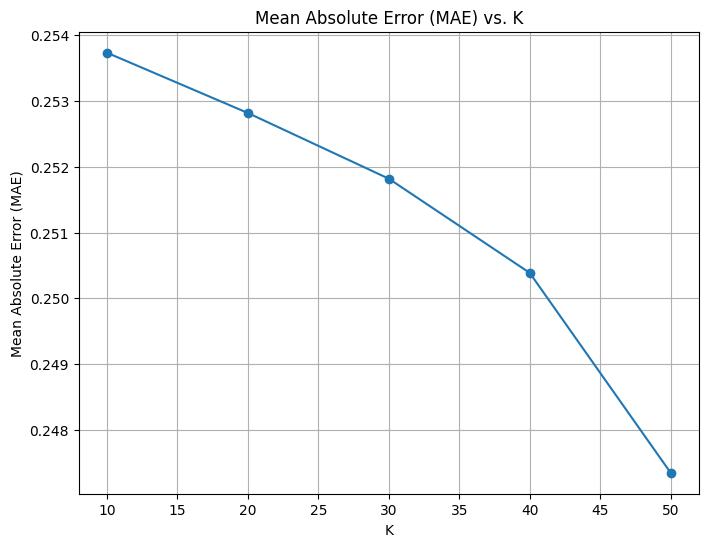

[0.2537312099520779, 0.25281563043219774, 0.251817549103528, 0.25038705558067814, 0.24735077795555752]


In [126]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Define a function to predict missing values and calculate MAE

def index_to_user_id(index):
    return pivot_table_normalized.index[index]

def predict_and_calculate_mae(K, cosine_similarity_matrix, normalized_table, folds=5):
    kf = KFold(n_splits=folds)
    mae_values = []

    for train_index, val_index in kf.split(normalized_table):
        train_set = normalized_table.iloc[train_index]
        val_set = normalized_table.iloc[val_index]


        mae_fold = 0

        for val_user_index, val_user_row in val_set.iterrows():
            # Find top K similar users
            user_index = val_set.index.get_loc(val_user_index)
            top_similar_users_indices = np.argsort(cosine_similarity_matrix[user_index])[::-1][:K]
            similar_users_ids = [index_to_user_id(index) for index in top_similar_users_indices]
            # print(f"User {val_user_index} top {K} similar users: {similar_users_ids}")
            
            reviewer_ratings = pivot_table_normalized.loc[val_user_index]     
            rated_items = reviewer_ratings[reviewer_ratings != 0.0]

            # print("Items rated by reviewer", val_user_index, ":")
            # print(rated_items)

            filtered_df = pivot_table_normalized.loc[similar_users_ids]
            users_ratings_for_specific_user = filtered_df[rated_items.index]
            predicted_ratings = users_ratings_for_specific_user.mean()

            # print("Predicted ratings of similar users for reviewer", val_user_index, ":")
            # print(predicted_ratings)



            # Calculate MAE
            mae_fold += mean_absolute_error(rated_items, predicted_ratings)

        mae_fold /= len(val_set)
        mae_values.append(mae_fold)

    avg_mae = np.mean(mae_values)

 


    return avg_mae

# Define values of K to be tested
it = [10, 20, 30, 40, 50]

# Perform K-folds validation and calculate MAE for each value of K
x = []
for K in it:
    mae = predict_and_calculate_mae(K, cosine_similarity_matrix, pivot_table_normalized)
    x.append(mae)
result = scale_Plot(it, x)
print(result)


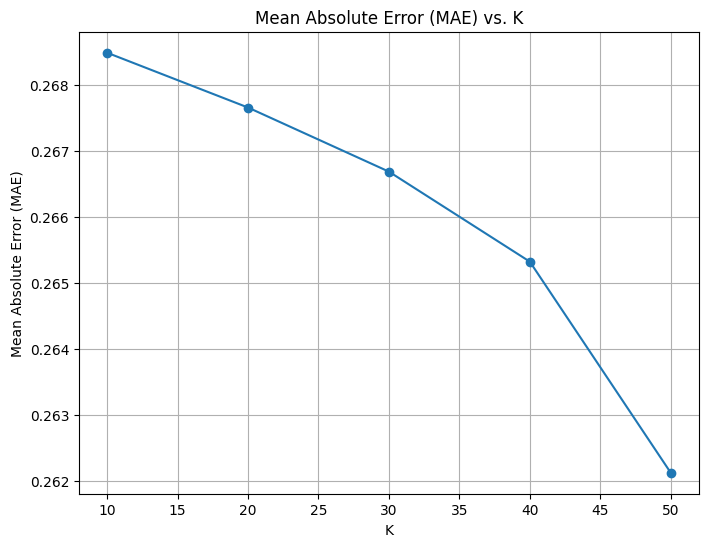

[0.26848293196492434, 0.267653168389171, 0.2666826110582889, 0.2653196694422307, 0.26212407625373785]


In [129]:
transposed_pivot_table = user_item_matrix.transpose()

from sklearn.preprocessing import MinMaxScaler

# Assuming pivot_table is the DataFrame containing the pivot table with user's reviews

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling to normalize the ratings
pivot_table_normalized = transposed_pivot_table.copy()  # Create a copy to preserve the original pivot table
pivot_table_normalized[:] = scaler.fit_transform(pivot_table_normalized.values)




import numpy as np
# Convert the pivot table to a numpy array
matrix = transposed_pivot_table.values

# Calculate the dot product of the matrix with its transpose
dot_product = np.dot(matrix, matrix.T)

# Calculate the norms of the rows of the matrix
norms = np.linalg.norm(matrix, axis=1)

# Calculate the cosine similarity matrix
cosine_similarity_matrix = dot_product / np.outer(norms, norms)



import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Define a function to predict missing values and calculate MAE

def index_to_user_id(index):
    return pivot_table_normalized.index[index]

def predict_and_calculate_mae(K, cosine_similarity_matrix, normalized_table, folds=5):
    kf = KFold(n_splits=folds)
    mae_values = []

    for train_index, val_index in kf.split(normalized_table):
        train_set = normalized_table.iloc[train_index]
        val_set = normalized_table.iloc[val_index]


        mae_fold = 0

        for val_user_index, val_user_row in val_set.iterrows():
            # Find top K similar users
            user_index = val_set.index.get_loc(val_user_index)
            top_similar_users_indices = np.argsort(cosine_similarity_matrix[user_index])[::-1][:K]
            similar_users_ids = [index_to_user_id(index) for index in top_similar_users_indices]
            # print(f"User {val_user_index} top {K} similar users: {similar_users_ids}")
            
            reviewer_ratings = pivot_table_normalized.loc[val_user_index]     
            rated_items = reviewer_ratings[reviewer_ratings != 0.0]

            # print("Items rated by reviewer", val_user_index, ":")
            # print(rated_items)

            filtered_df = pivot_table_normalized.loc[similar_users_ids]
            users_ratings_for_specific_user = filtered_df[rated_items.index]
            predicted_ratings = users_ratings_for_specific_user.mean()

            # print("Predicted ratings of similar users for reviewer", val_user_index, ":")
            # print(predicted_ratings)



            # Calculate MAE
            mae_fold += mean_absolute_error(rated_items, predicted_ratings)

        mae_fold /= len(val_set)
        mae_values.append(mae_fold)

    avg_mae = np.mean(mae_values)

 


    return avg_mae

# Define values of K to be tested
it = [10, 20, 30, 40, 50]

# Perform K-folds validation and calculate MAE for each value of K
x = []
for K in it:
    mae = predict_and_calculate_mae(K, cosine_similarity_matrix, pivot_table_normalized)
    x.append(mae)
result = scale_Plot(it, x)
print(result)




In [130]:
# Summing the ratings for each user
user_item_matrix['Total_Rating'] = user_item_matrix.sum(axis=1)

# Sorting users based on their total rating sums in descending order
sorted_users = user_item_matrix.sort_values(by='Total_Rating', ascending=False)

top_10_users = sorted_users.head(10)

print("Top 10 Users with Maximum Sum of Ratings for Products:")
print(top_10_users)

Top 10 Users with Maximum Sum of Ratings for Products:
asin            B00000JBHP  B00001P4XA  B00001P4XH  B00001P4ZH  B00001P505  \
reviewerID                                                                   
A2DKQQIZ793AV5         0.0         0.0         0.0         0.0         0.0   
AIFLY2HF8NS8U          0.0         0.0         0.0         0.0         0.0   
A6FIAB28IS79           0.0         5.0         0.0         3.0         0.0   
A2XX2A4OJCDNLZ         0.0         0.0         0.0         0.0         0.0   
A23GFTVIETX7DS         0.0         0.0         0.0         0.0         0.0   
A2XXBZPQT5EXHV         0.0         0.0         0.0         0.0         0.0   
A979ON3H1O593          0.0         0.0         1.0         0.0         0.0   
A1UQBFCERIP7VJ         0.0         0.0         0.0         0.0         0.0   
A3077MQTAKOVFZ         0.0         0.0         0.0         5.0         0.0   
A1JUKS0DSO2XZG         0.0         0.0         0.0         0.0         0.0   

asin    